In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Data

In [3]:
X = np.random.randn(200,2)
X

array([[-0.28938443,  0.02566534],
       [-0.55421141,  1.3647531 ],
       [-0.71760678,  0.42682317],
       [-0.53275155,  1.43811648],
       [-2.34719772, -1.31174963],
       [-0.69071995,  0.08588851],
       [-2.18785913, -0.56543592],
       [-0.25300446,  0.2009523 ],
       [ 1.21599964, -0.15368857],
       [ 0.57810028,  0.13589939],
       [ 1.17576784,  1.92494697],
       [ 1.30379107, -1.67505547],
       [ 0.22945473, -0.20729009],
       [ 0.00796862,  0.22463504],
       [ 0.18407902, -0.98472437],
       [-0.65553086,  1.19594246],
       [-1.61358426,  0.81424008],
       [-0.275281  ,  0.63373937],
       [-0.50481049,  0.58919302],
       [ 0.95566101, -1.1530597 ],
       [-1.7206354 ,  0.20058906],
       [-1.36444942, -0.93519342],
       [-0.04735752, -1.15464434],
       [ 0.34370874, -0.47273365],
       [-0.87678744,  0.61276675],
       [-0.35775136, -0.1371594 ],
       [-0.63958301, -2.08690173],
       [ 1.14081661,  0.17062115],
       [-0.13084771,

In [4]:
y = np.logical_xor(X[:,0]>0, X[:,1]>0)
y

array([ True,  True,  True,  True, False,  True, False,  True,  True,
       False, False,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True, False, False,  True,  True, False, False,
       False,  True,  True,  True,  True,  True,  True,  True, False,
       False, False, False,  True,  True, False,  True, False, False,
       False, False,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True, False, False, False,  True,  True,
        True, False,  True, False,  True, False,  True, False,  True,
        True, False, False, False,  True,  True,  True,  True, False,
        True, False,  True,  True, False, False,  True, False,  True,
        True,  True, False,  True,  True,  True, False, False, False,
        True, False, False, False, False, False, False,  True,  True,
        True, False,  True,  True,  True, False, False, False,  True,
        True,  True, False, False, False, False, False,  True,  True,
        True,  True,

In [5]:
y = np.where(y, 1, -1)
y

array([ 1,  1,  1,  1, -1,  1, -1,  1,  1, -1, -1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1, -1, -1,  1,  1, -1, -1, -1,  1,  1,  1,  1,  1,  1,
        1, -1, -1, -1, -1,  1,  1, -1,  1, -1, -1, -1, -1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1, -1, -1, -1,  1,  1,  1, -1,  1, -1,  1,
       -1,  1, -1,  1,  1, -1, -1, -1,  1,  1,  1,  1, -1,  1, -1,  1,  1,
       -1, -1,  1, -1,  1,  1,  1, -1,  1,  1,  1, -1, -1, -1,  1, -1, -1,
       -1, -1, -1, -1,  1,  1,  1, -1,  1,  1,  1, -1, -1, -1,  1,  1,  1,
       -1, -1, -1, -1, -1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1, -1, -1,
        1,  1,  1, -1, -1,  1, -1,  1, -1, -1, -1, -1, -1, -1,  1, -1, -1,
       -1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1,  1,
       -1,  1, -1,  1,  1, -1,  1, -1, -1,  1,  1,  1, -1, -1,  1,  1,  1,
        1, -1,  1, -1,  1,  1, -1,  1, -1,  1,  1, -1,  1])

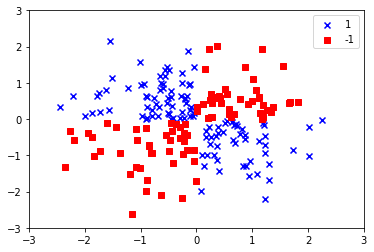

In [7]:
plt.scatter(X[y==1, 0], X[y==1,1], c='b', marker='x', label='1')
plt.scatter(X[y==-1, 0], X[y==-1,1], c='r', marker='s', label='-1')
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.legend(loc='best')
plt.show()

# Split

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Model

In [13]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', gamma=0.1, C=10.0)
svm.fit(X_train, y_train)

SVC(C=10.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

# Validation

In [15]:
from sklearn.metrics import accuracy_score
y_pred = svm.predict(X_test)
print('accuracy - ', accuracy_score(y_test, y_pred))

accuracy -  0.8666666666666667


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


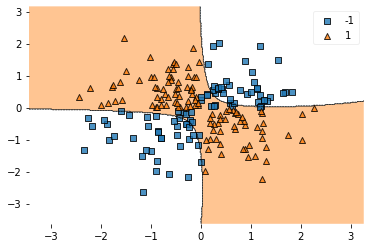

In [18]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X, y, clf=svm)

# Predict

In [21]:
prediction = svm.predict([[-1.5, 2.0]])
print(prediction)

[1]


In [22]:
print('For prediction enter features')
F = []
for _ in range(2):
  f = float(input())
  F.append(f)
prediction = svm.predict(np.asarray(F).reshape(1,-1))
print(prediction)

For prediction enter features
-2
-2
[-1]
